In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression,HuberRegressor,LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.linear_model import RidgeClassifier,ridge_regression,LogisticRegression,LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve


In [85]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

df_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,15000,40.0,175.0,70.0,84.0,1.5,1.5,1.0,1.0,120.0,...,122.0,45.0,109.0,16.0,1.0,1.0,15.0,9.0,25.0,0.0
1,15001,45.0,155.0,55.0,72.4,0.6,0.5,1.0,1.0,102.0,...,104.0,56.0,109.0,11.5,1.0,0.8,14.0,10.0,13.0,0.0
2,15002,40.0,160.0,55.0,76.0,1.2,1.2,1.0,1.0,115.0,...,84.0,77.0,74.0,13.3,1.0,0.8,14.0,10.0,11.0,0.0
3,15003,45.0,150.0,50.0,74.4,1.0,1.0,1.0,1.0,96.0,...,63.0,85.0,82.0,13.4,1.0,0.7,23.0,15.0,18.0,0.0
4,15004,35.0,185.0,80.0,90.0,0.8,1.0,1.0,1.0,113.0,...,89.0,59.0,105.0,15.6,1.0,0.9,16.0,26.0,20.0,0.0


In [86]:
df_train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,...,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,...,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,...,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,...,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,...,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0


# Feature engeenering


In [87]:
# Create new features for train

# 1. Cholesterol to LDL Ratio
df_train['cholesterol_ldl_ratio'] = df_train['Cholesterol'] / df_train['LDL']

# 2. BMI (Body Mass Index) = weight(kg) / height(m)^2
df_train['bmi'] = df_train['weight(kg)'] / (df_train['height(cm)'] / 100) ** 2

# 3. Waist-to-Height Ratio
df_train['waist_to_height_ratio'] = df_train['waist(cm)'] / df_train['height(cm)']

# 4. Blood Pressure Difference (Systolic - Relaxation)
df_train['bp_difference'] = df_train['systolic'] - df_train['relaxation']

# Check the new features
df_train[['cholesterol_ldl_ratio', 'bmi', 'waist_to_height_ratio', 'bp_difference']].head()


,cholesterol_ldl_ratio,bmi,waist_to_height_ratio,bp_difference
0,1.535088,27.681661,0.541176,55.0
1,1.693694,27.681661,0.552941,44.0
2,1.714286,25.951557,0.494118,44.0
3,1.621849,24.444444,0.566667,44.0
4,1.641667,21.484375,0.450000,41.0


In [88]:
# Create new features for test

# 1. Cholesterol to LDL Ratio
df_test['cholesterol_ldl_ratio'] = df_test['Cholesterol'] / df_test['LDL']

# 2. BMI (Body Mass Index) = weight(kg) / height(m)^2
df_test['bmi'] = df_test['weight(kg)'] / (df_test['height(cm)'] / 100) ** 2

# 3. Waist-to-Height Ratio
df_test['waist_to_height_ratio'] = df_test['waist(cm)'] / df_test['height(cm)']

# 4. Blood Pressure Difference (Systolic - Relaxation)
df_test['bp_difference'] = df_test['systolic'] - df_test['relaxation']

# Check the new features
df_test[['cholesterol_ldl_ratio', 'bmi', 'waist_to_height_ratio', 'bp_difference']].head()

,cholesterol_ldl_ratio,bmi,waist_to_height_ratio,bp_difference
0,1.642202,22.857143,0.480000,61.0
1,1.706422,22.892820,0.467097,34.0
2,2.256757,21.484375,0.475000,51.0
3,2.182927,22.222222,0.496000,29.0
4,1.742857,23.374726,0.486486,40.0


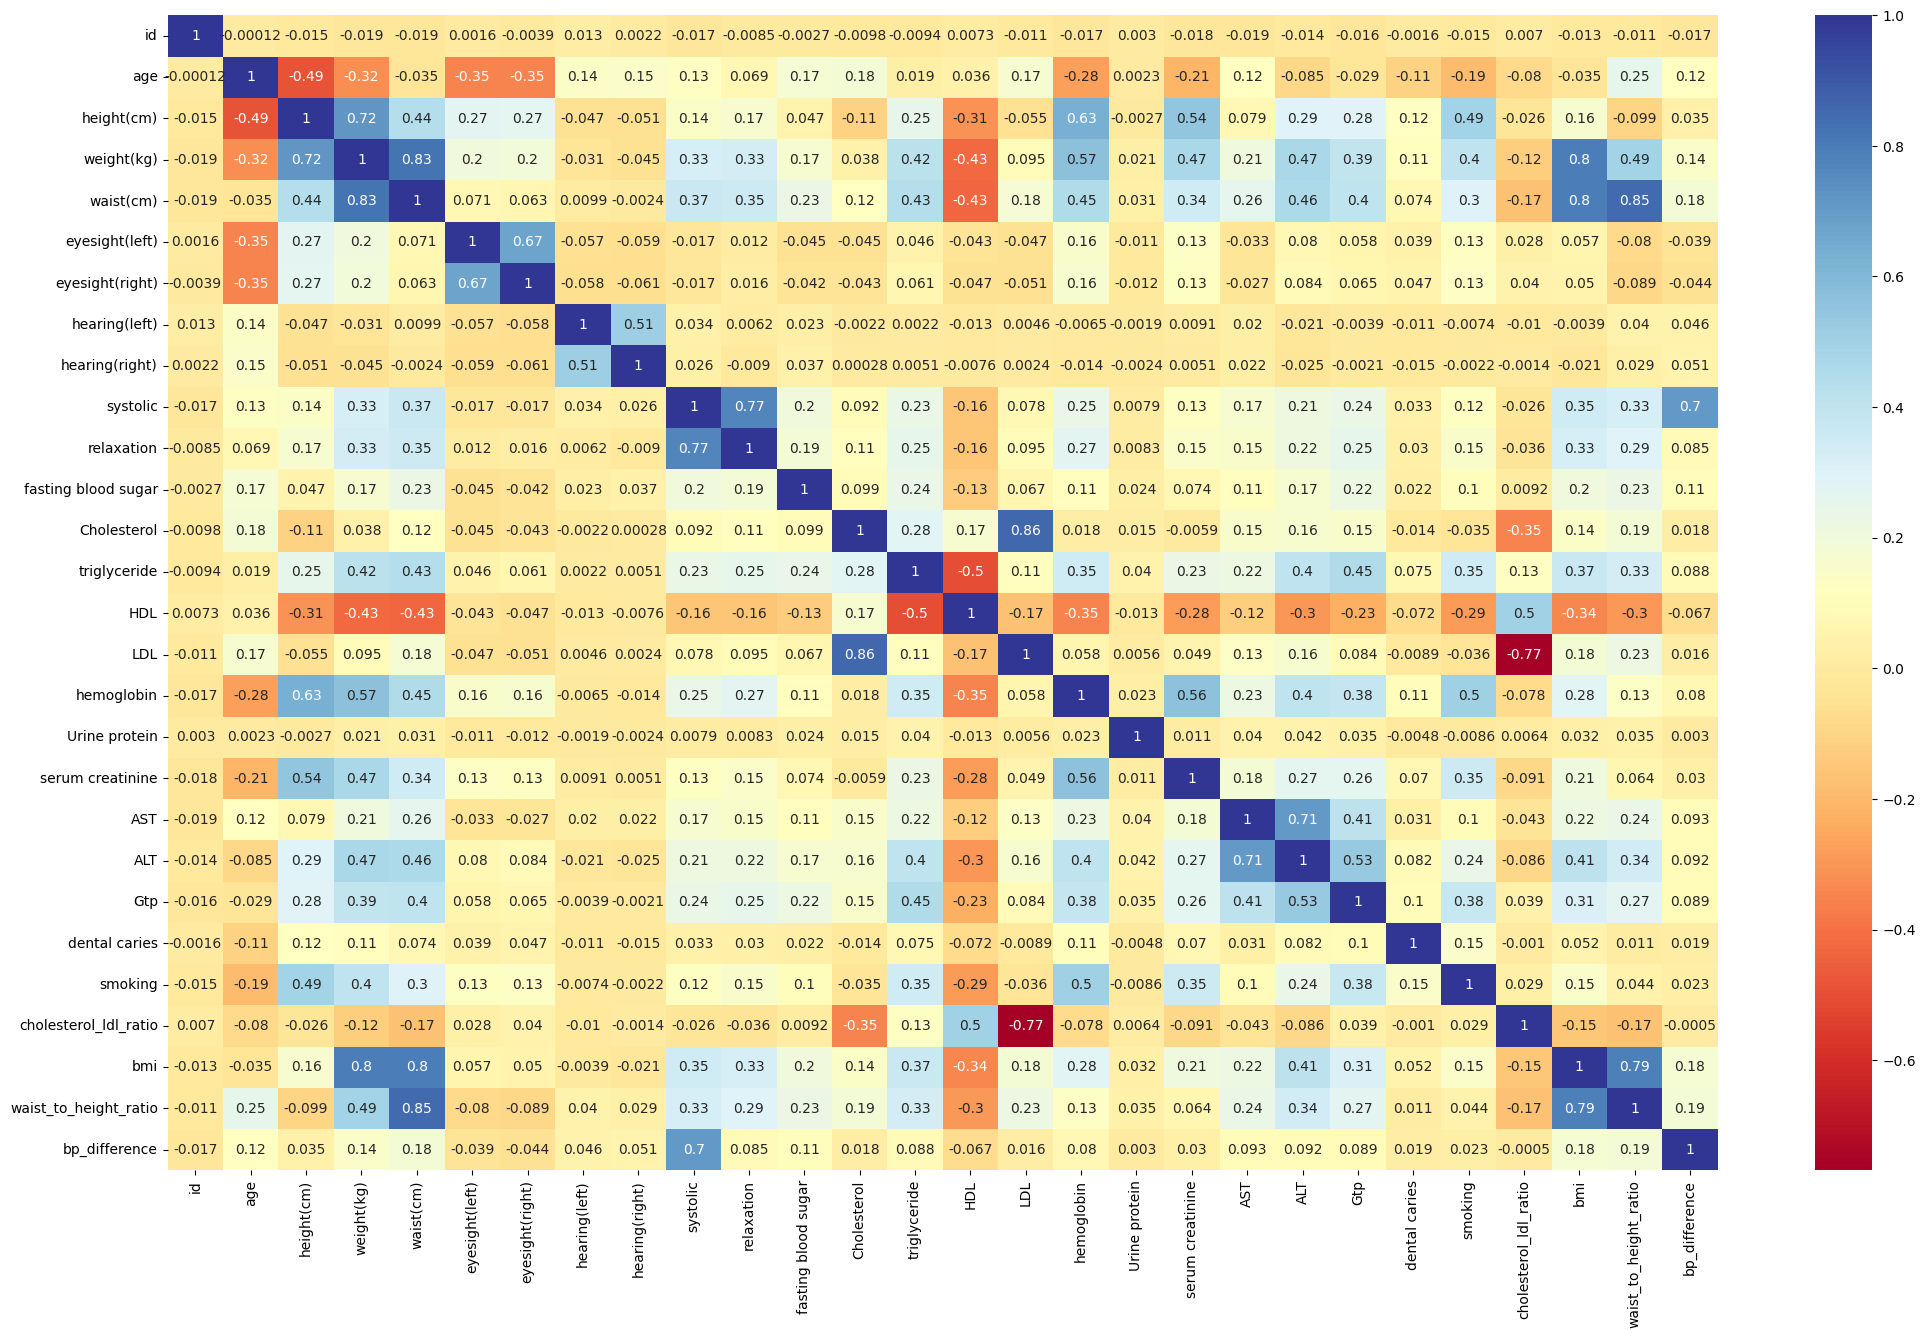

In [89]:
plt.subplots(figsize=(25,15))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [90]:
def WoE(data, feature_name, target_name):
    df = data.copy()
    
    # Group by the feature and calculate the count of events and non-events
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})
    
    # Calculate percentages
    woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    
    # Calculate WoE
    woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    
    # Add total observations and their percentage
    woe_table['Total Observations'] = woe_table['# of events'] + woe_table['# of non-events']
    woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)

    return woe_table.reset_index()

In [91]:
# Create WoE plot Function 

def WoE_plot(df_woe,x_category,Woe):
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
    ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

    # Create the pointplot on the primary axis (ax1)
    sns.pointplot(data=df_woe, x=x_category, y=Woe, color='red', linewidth=2, ax=ax1)
    ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
    ax1.tick_params(axis='y', colors='red')
    ax1.set_xlabel(f'{x_category}')
    # plt.xticks(rotation=45)
    # Set x-tick rotation directly on the x-axis for ax1
    for label in ax1.get_xticklabels():
        label.set_rotation(90)
    # Create the barplot on the secondary axis (ax2)
    sns.barplot(data=df_woe, x=x_category, y='Percent of Observations', alpha=0.3, ax=ax2)
    ax2.set_ylabel('Rate of Observations')
    ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
    ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
    # Set up the grids and display the plot
    ax1.grid(visible=True, which='major', linestyle='--')
    plt.title("WoE change plot")
    plt.show()

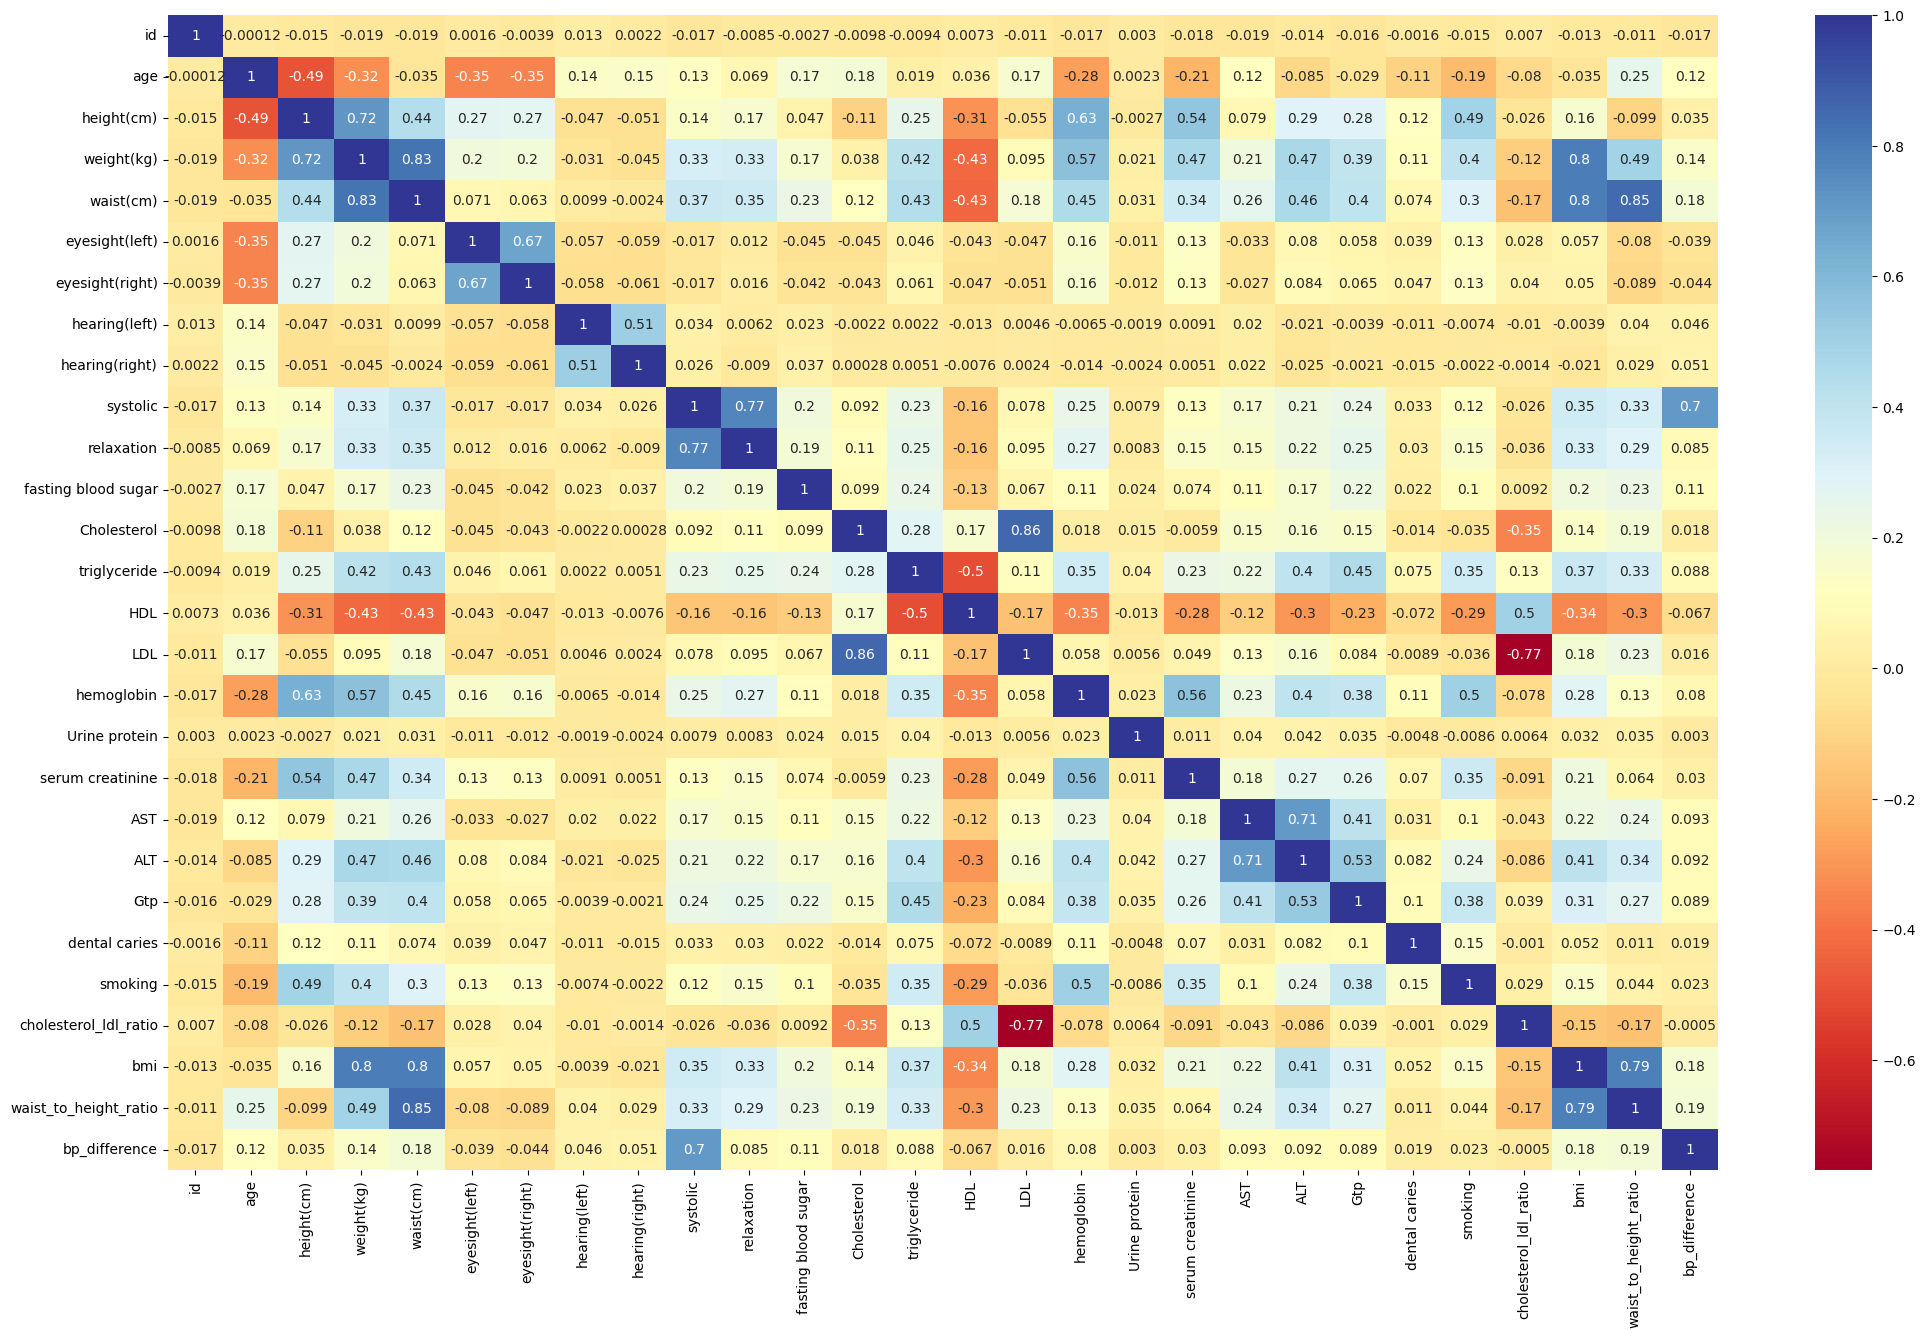

In [92]:
plt.subplots(figsize=(25,15))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [94]:
X = df_train.drop(columns=['id','smoking'])
y = df_train['smoking']

df_test = df_test.drop(columns='id')


# Split data into train and test for demonstration purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [95]:
# RandomizedSearch to find best Hyperparametors

"""from hyperparameter_search import randomized_search_rf

# Assuming X_train and y_train are your training data
best_rf_model, best_rf_params, best_rf_score = randomized_search_rf(X_train, y_train)"""


'from hyperparameter_search import randomized_search_rf\n\n# Assuming X_train and y_train are your training data\nbest_rf_model, best_rf_params, best_rf_score = randomized_search_rf(X_train, y_train)'

In [96]:
"""# Get predicted probabilities for the positive class (usually class 1)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Test ROC AUC Score:", test_roc_auc)"""

'# Get predicted probabilities for the positive class (usually class 1)\ny_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]\n\n# Calculate ROC AUC score\ntest_roc_auc = roc_auc_score(y_test, y_pred_proba)\n\nprint("Test ROC AUC Score:", test_roc_auc)'

In [97]:
"""import optuna
from functools import partial

# Create and run an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(partial(objective, X_train=X_train, y_train=y_train), n_trials=20)

# Print the best parameters and score
print("Best Parameters:", study.best_params)
print("Best ROC-AUC:", study.best_value)

# Train the best model on the full training set
best_rf = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Evaluate on the test set
test_roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print("Test ROC-AUC:", test_roc_auc)"""


'import optuna\nfrom functools import partial\n\n# Create and run an Optuna study\nstudy = optuna.create_study(direction="maximize")\nstudy.optimize(partial(objective, X_train=X_train, y_train=y_train), n_trials=20)\n\n# Print the best parameters and score\nprint("Best Parameters:", study.best_params)\nprint("Best ROC-AUC:", study.best_value)\n\n# Train the best model on the full training set\nbest_rf = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)\nbest_rf.fit(X_train, y_train)\n\n# Evaluate on the test set\ntest_roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])\nprint("Test ROC-AUC:", test_roc_auc)'

# Sample RandomForest MOdel with best hyperparametors

In [98]:
"""model = RandomForestClassifier(
        criterion= 'entropy',
        min_samples_split=6,
        min_samples_leaf=10,
        max_depth=19,
        max_features='sqrt',
        n_estimators=493,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

roc_auc_train = cross_val_score(model, X_train, y_train, cv=3, scoring="roc_auc", n_jobs=-1).mean()
roc_auc_test = cross_val_score(model, X_test, y_test, cv=3, scoring="roc_auc", n_jobs=-1).mean()
print(roc_auc_train)
print(roc_auc_test)
"""

'model = RandomForestClassifier(\n        criterion= \'entropy\',\n        min_samples_split=6,\n        min_samples_leaf=10,\n        max_depth=19,\n        max_features=\'sqrt\',\n        n_estimators=493,\n        bootstrap=True,\n        random_state=42,\n        n_jobs=-1\n    )\n\nroc_auc_train = cross_val_score(model, X_train, y_train, cv=3, scoring="roc_auc", n_jobs=-1).mean()\nroc_auc_test = cross_val_score(model, X_test, y_test, cv=3, scoring="roc_auc", n_jobs=-1).mean()\nprint(roc_auc_train)\nprint(roc_auc_test)\n'

In [99]:
"""# Get the predicted probabilities for the positive class (class 1)
model.fit(X_train,y_train)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
"""

"# Get the predicted probabilities for the positive class (class 1)\nmodel.fit(X_train,y_train)\ny_prob = model.predict_proba(X_test)[:, 1]\n\n# Calculate ROC AUC score\nroc_auc = roc_auc_score(y_test, y_prob)\nprint(f'ROC AUC Score: {roc_auc:.2f}')\n\n# Calculate the ROC curve\nfpr, tpr, thresholds = roc_curve(y_test, y_prob)\n\n# Plot the ROC curve\nplt.figure(figsize=(8, 6))\nplt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')\nplt.plot([0, 1], [0, 1], color='gray', linestyle='--')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('Receiver Operating Characteristic (ROC) Curve')\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show()\n"

In [100]:
"""# Get the predicted probabilities for the positive class (class 1)
model.fit(X_train,y_train)
y_prob = model.predict_proba(df_test)[:, 1]"""


'# Get the predicted probabilities for the positive class (class 1)\nmodel.fit(X_train,y_train)\ny_prob = model.predict_proba(df_test)[:, 1]'

# RandomForestClassifier with PolynomialFeature

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


ROC AUC Score: 0.88


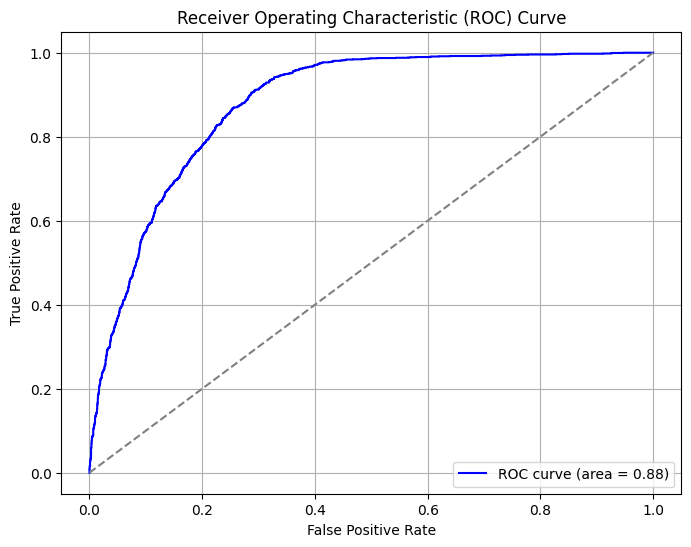

In [101]:
# Step 1: Apply polynomial feature expansion without scaling
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Train the RandomForestClassifier
model = RandomForestClassifier( criterion= 'entropy',
        min_samples_split=6,
        min_samples_leaf=10,
        max_depth=19,
        max_features='sqrt',
        n_estimators=493,
        bootstrap=True,
        random_state=42,
        n_jobs=-1)
model.fit(X_train_poly, y_train)

# Step 3: Get predicted probabilities for ROC AUC
y_pred_proba = model.predict_proba(X_test_poly)[:, 1]  # Probability for the positive class (smoking=1)

# Step 4: Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 5: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [102]:
# Apply polynomial feature transformation on the new test data
X_test_poly_new = poly.transform(df_test)

# Get predicted probabilities for the positive class (smoking=1)
y_pred_proba_new = model.predict_proba(X_test_poly_new)[:, 1]


# Submit result
submission['smoking'] = y_pred_proba_new
submission.to_csv('my_submission.csv',index=False)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Checking for overfitting

Brier Score (Uncalibrated): 0.1354


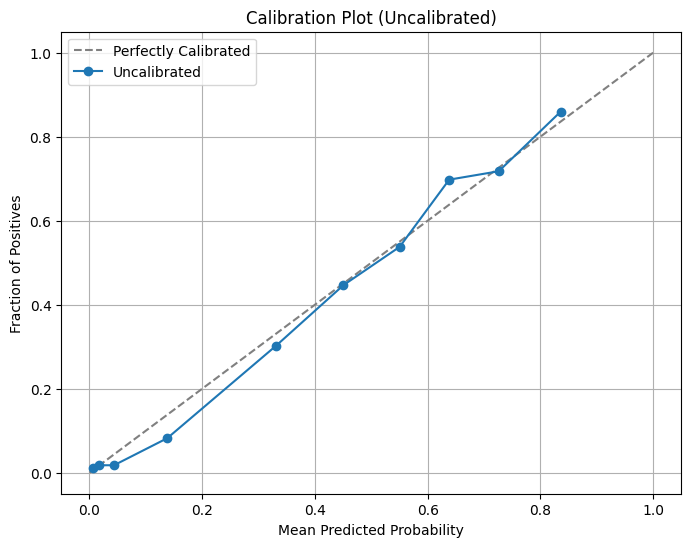

In [106]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, roc_auc_score

brier_uncalibrated = brier_score_loss(y_test, y_pred_proba)
print(f"Brier Score (Uncalibrated): {brier_uncalibrated:.4f}")

# Function to plot calibration curves
def plot_calibration_curve(y_true, y_probs_list, labels, title):
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated', color='gray')
    for y_prob, label in zip(y_probs_list, labels):
        prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10, strategy='quantile')
        plt.plot(prob_pred, prob_true, marker='o', label=label)
    plt.title(title)
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
# Plot calibration curve for uncalibrated model
plot_calibration_curve(y_test, [y_pred_proba], ['Uncalibrated'], 'Calibration Plot (Uncalibrated)')

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: Use

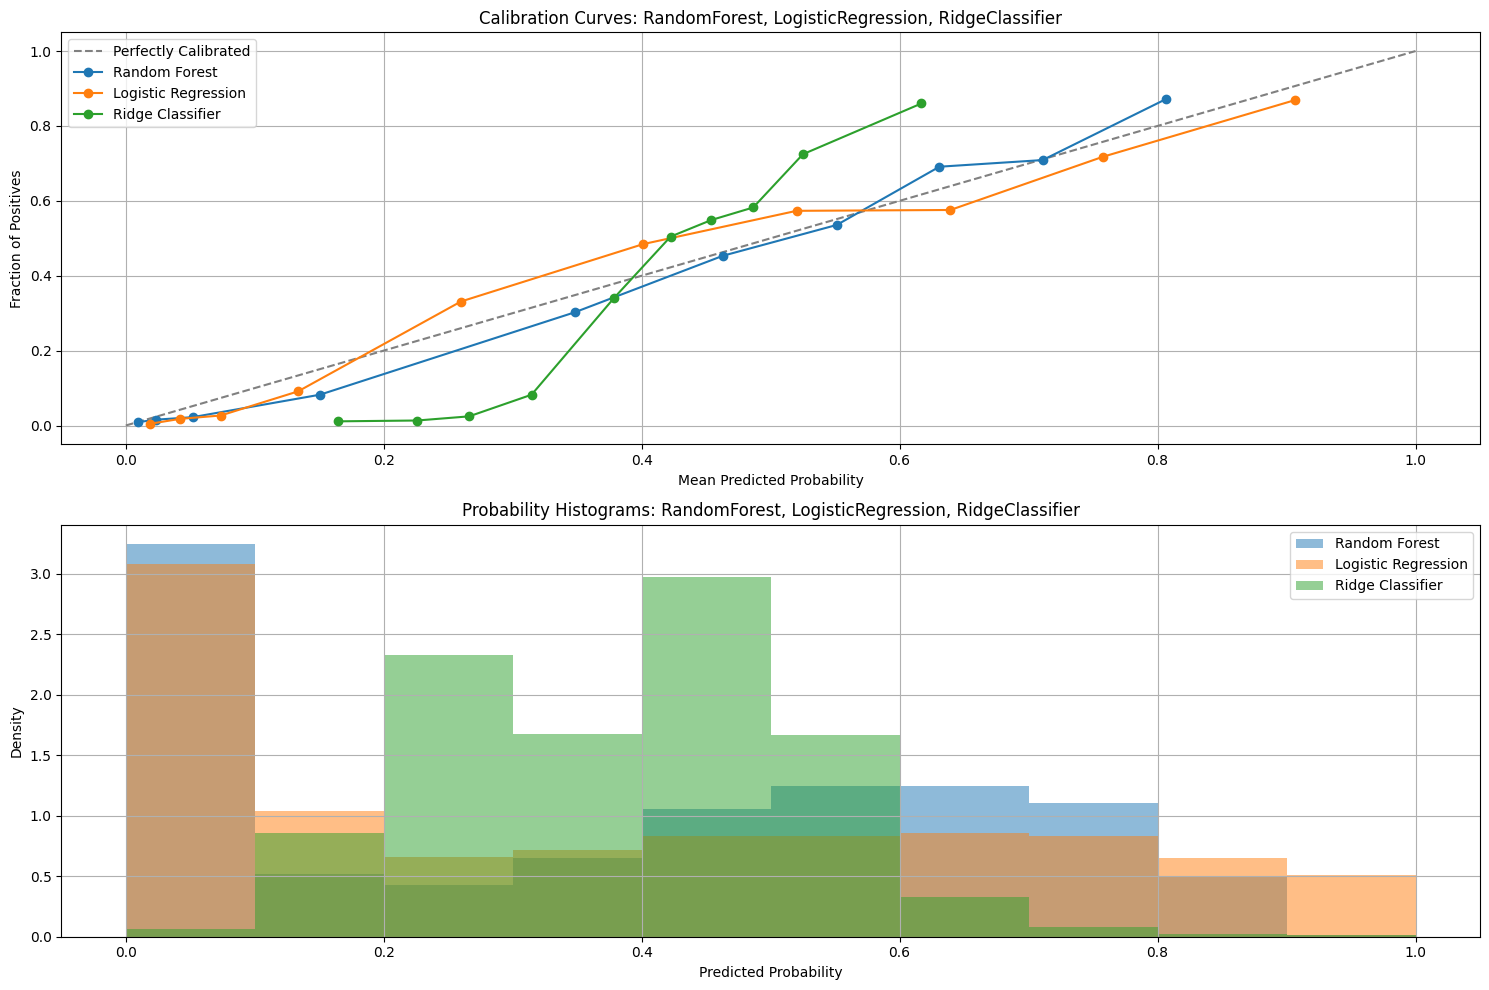

Random Forest Brier Score: 0.1361
Logistic Regression Brier Score: 0.1427
Ridge Classifier Brier Score: 0.1718


In [111]:
# Train models without calibration
models = {
    'Random Forest': RandomForestClassifier(criterion= 'entropy',
        min_samples_split=6,
        min_samples_leaf=10,
        max_depth=19,
        max_features='sqrt',
        n_estimators=493,
        bootstrap=True,
        random_state=42,
        n_jobs=-1),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Ridge Classifier': RidgeClassifier()
}

# Dictionary to store predicted probabilities
probs = {}

# Train each model and get predicted probabilities
for name, model in models.items():
    model.fit(X_train, y_train)
    # RidgeClassifier doesn't have predict_proba; we use decision_function and scale it
    if hasattr(model, "predict_proba"):
        probs[name] = model.predict_proba(X_test)[:, 1]
    else:
        # Convert decision function output to probabilities using min-max scaling
        decision_values = model.decision_function(X_test)
        probs[name] = (decision_values - decision_values.min()) / (decision_values.max() - decision_values.min())

# Plot calibration curves and probability histograms
def plot_calibration_and_histograms(y_true, probs, title):
    plt.figure(figsize=(15, 10))

    # Calibration curve subplot
    plt.subplot(2, 1, 1)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

    for name, prob in probs.items():
        prob_true, prob_pred = calibration_curve(y_true, prob, n_bins=10, strategy='quantile')
        plt.plot(prob_pred, prob_true, marker='o', label=name)

    plt.title(f'Calibration Curves: {title}')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.legend(loc='best')
    plt.grid()

    # Probability histogram subplot
    plt.subplot(2, 1, 2)
    for name, prob in probs.items():
        plt.hist(prob, bins=10, alpha=0.5, label=name, range=(0, 1), density=True)

    plt.title(f'Probability Histograms: {title}')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid()

    plt.tight_layout()
    plt.show()

# Plot calibration curves and probability histograms for all models
plot_calibration_and_histograms(y_test, probs, 'RandomForest, LogisticRegression, RidgeClassifier')

# Calculate and display Brier scores for each model
for name, prob in probs.items():
    brier = brier_score_loss(y_test, prob)
    print(f'{name} Brier Score: {brier:.4f}')


Brier Score (Uncalibrated): 0.1354


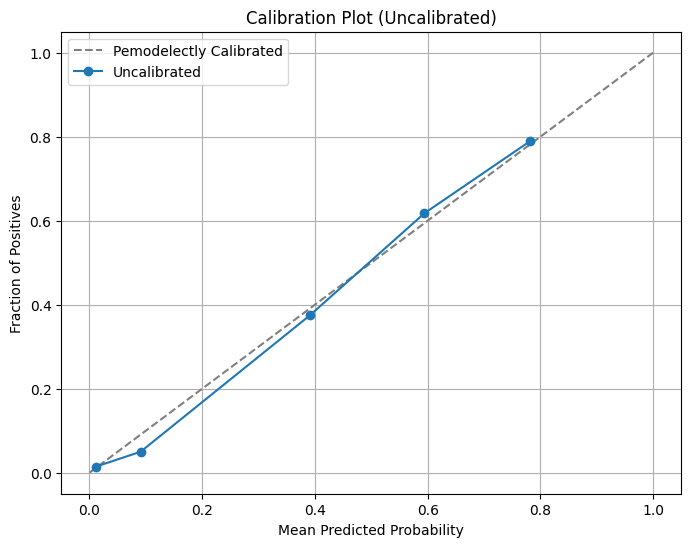

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: Use

Brier Score (Sigmoid Calibration): 0.1430
Brier Score (Isotonic Calibration): 0.1410


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


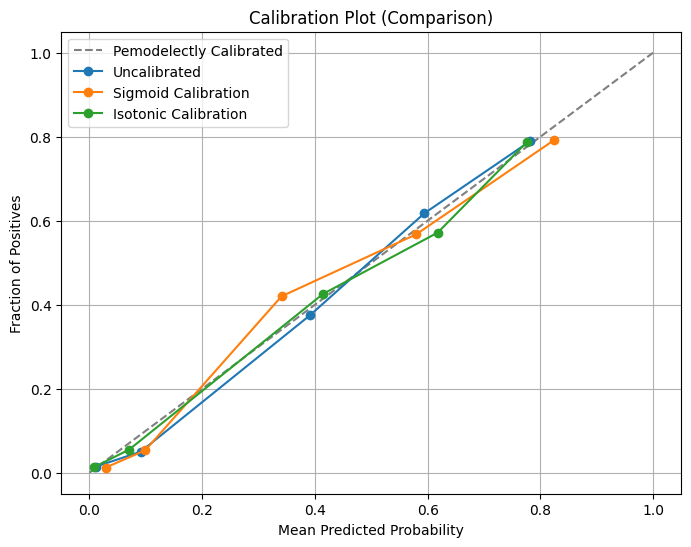

In [113]:
# Calculate Brier score for the uncalibrated model
brier_uncalibrated = brier_score_loss(y_test, y_pred_proba)
print(f"Brier Score (Uncalibrated): {brier_uncalibrated:.4f}")

# Function to plot calibration curves
def plot_calibration_curve(y_true, y_probs_list, labels, title):
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Pemodelectly Calibrated', color='gray')
    for y_prob, label in zip(y_probs_list, labels):
        prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=5, strategy='quantile')
        plt.plot(prob_pred, prob_true, marker='o', label=label)
    plt.title(title)
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot calibration curve for uncalibrated model
plot_calibration_curve(y_test, [y_pred_proba], ['Uncalibrated'], 'Calibration Plot (Uncalibrated)')

# Apply Platt scaling (sigmoid) calibration
model_sigmoid = CalibratedClassifierCV(model, method='sigmoid', cv=4)
model_sigmoid.fit(X_train, y_train)
y_prob_sigmoid = model_sigmoid.predict_proba(X_test)[:, 1]

# Calculate Brier score for sigmoid-calibrated model
brier_sigmoid = brier_score_loss(y_test, y_prob_sigmoid)
print(f"Brier Score (Sigmoid Calibration): {brier_sigmoid:.4f}")

# Apply Isotonic regression calibration
model_isotonic = CalibratedClassifierCV(model, method='isotonic', cv=4)
model_isotonic.fit(X_train, y_train)
y_prob_isotonic = model_isotonic.predict_proba(X_test)[:, 1]

# Calculate Brier score for isotonic-calibrated model
brier_isotonic = brier_score_loss(y_test, y_prob_isotonic)
print(f"Brier Score (Isotonic Calibration): {brier_isotonic:.4f}")

# Plot calibration curves for all three models
plot_calibration_curve(
    y_test,
    [y_pred_proba, y_prob_sigmoid, y_prob_isotonic],
    ['Uncalibrated', 'Sigmoid Calibration', 'Isotonic Calibration'],
    'Calibration Plot (Comparison)'
)


In [114]:
# Predict_proba for real test data 
y_prob_isotonic = model_isotonic.predict_proba(df_test)[:, 1]

submission['smoking'] = y_prob_isotonic
submission.to_csv('my_submission.csv',index=False)
submission

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [115]:
submission['smoking'] = y_prob_isotonic

submission.to_csv('my_submission.csv',index=False)

submission

,id,smoking
0,15000,0.786421
1,15001,0.007624
2,15002,0.064965
3,15003,0.007624
4,15004,0.694403
...,...,...
9995,24995,0.329894
9996,24996,0.854913
9997,24997,0.487182
9998,24998,0.006428
